In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



In [3]:
# Load the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')



In [4]:
# Drop unnecessary columns and handle missing values
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1, inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})



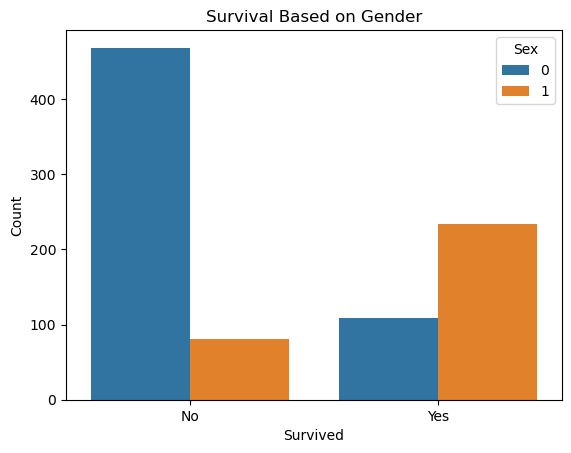

In [5]:
# Data visualization
# Visualize survival based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Based on Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



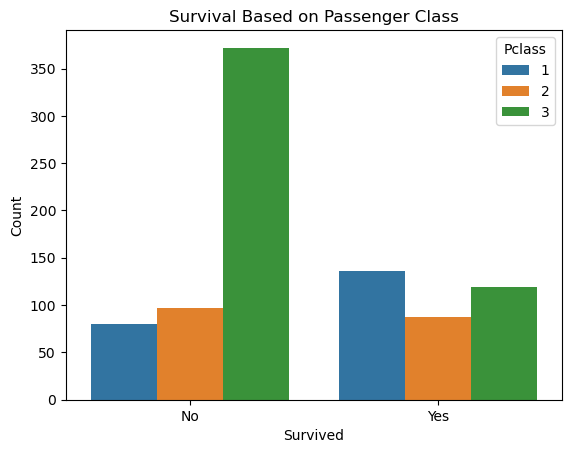

In [6]:
# Visualize survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Based on Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



In [7]:
# Prepare data for modeling
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [11]:
# Function to create a neural network model
def create_model(optimizer='adam', hidden_units=(64,), input_dim=6):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units[0], activation='relu', input_dim=input_dim))
    for units in hidden_units[1:]:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [12]:
# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

#https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

C:\Users\joeml\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [13]:
# Define the parameters for grid search
parameters = {
    'optimizer': ['adam', 'sgd'],
    'hidden_units': [(64,), (128,), (64, 64), (128, 128)],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}



In [14]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring='accuracy', verbose=1)



In [15]:
# Perform grid search
grid_result = grid_search.fit(X_train_scaled, y_train)



Fitting 3 folds for each of 72 candidates, totalling 216 fits
8/8 [==============================] - 0s 1ms/step


In [16]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_result.best_params_)



Best parameters found by GridSearchCV:
{'batch_size': 32, 'epochs': 20, 'hidden_units': (64, 64), 'optimizer': 'adam'}


In [17]:
# Evaluate the best model
test_accuracy = grid_search.score(X_test_scaled, y_test)
print('Test accuracy:', test_accuracy)


6/6 [==============================] - 0s 1ms/step
Test accuracy: 0.8156424581005587
